In [36]:
import pandas as pd
import numpy as np
data_rfe=pd.read_csv('norm_tongren.csv')
data_rfe=np.array(data_rfe)
fea=data_rfe[:,:49]
target=data_rfe[:,49]
x_test=fea[:170,:]
y_test=target[:170]
x_train=fea[170:,:]
y_train=target[170:]

# SVM-RFE_RELIEF

In [37]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,alpha,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            #print(relief_score)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            #print(rfe_score)
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            #print(total_score)
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
    def sele_feature(self,alpha,optim_featur_num):
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            if len(candi_fea)==optim_featur_num:
                return candi_fea

In [38]:
rfe_relief_model=rfe_relief_SVM(x_train,y_train,0.1)

In [39]:
aver_mean_lis1,F_measure_lis1=rfe_relief_model.featu_score(0.15,5)
print(aver_mean_lis1,F_measure_lis1)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.8050080901925989, 0.8065373975677227, 0.8055195991440055, 0.802968578735842, 0.8024583746542095, 0.801946865702803, 0.8029672738660683, 0.803476173077927, 0.802969883605616, 0.8085834333733493, 0.8111370635210605, 0.8116433529933712, 0.8131687457591731, 0.8147032726133933, 0.8147006628738452, 0.8121548619447779, 0.8162364945978391, 0.8157275953859804, 0.8162377994676131, 0.8152186961741219, 0.8147058823529412, 0.8147058823529412, 0.8147071872227152, 0.8162404092071611, 0.8141930685317605, 0.8147084920924892, 0.8136880839292239, 0.8136867790594499, 0.8172647319797484, 0.8167519181585678, 0.8167519181585678, 0.8136776449710318, 0.8141904587922125, 0.8121483375959079, 0.8106177253510098, 0.8116381335142752, 0.8101075212693774, 0.8085756041547054, 0.8090858082363381, 0.8085756041547054, 0.8106164204812358, 0.8121470327261339, 0.8126585416775406, 0.8111292343024166, 0.8126598465473146, 0.8126611514170886] [0.781929948917585, 0.7

In [40]:
aver_mean_lis2,F_measure_lis2=rfe_relief_model.featu_score(0.25,5)
print(aver_mean_lis2,F_measure_lis2)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.8050080901925989, 0.8065373975677227, 0.8055195991440055, 0.802968578735842, 0.8024583746542095, 0.801946865702803, 0.8029672738660683, 0.803476173077927, 0.802969883605616, 0.8085834333733493, 0.8111370635210605, 0.8116433529933712, 0.8131687457591731, 0.8147032726133933, 0.8147006628738452, 0.8121548619447779, 0.8162364945978391, 0.8162364945978391, 0.8157275953859806, 0.8172582076308783, 0.8157275953859804, 0.8147058823529412, 0.8147071872227152, 0.8162377994676131, 0.8136880839292239, 0.8147058823529412, 0.8162404092071611, 0.8157315099953024, 0.8172647319797484, 0.8167519181585678, 0.8167519181585678, 0.8147111018320372, 0.8141904587922125, 0.8121483375959079, 0.8106177253510098, 0.8116381335142752, 0.8121496424656819, 0.8116381335142752, 0.8126598465473146, 0.8126585416775406, 0.8106164204812358, 0.8121483375959079, 0.8121496424656819, 0.8121496424656819, 0.8126598465473146, 0.8126611514170886] [0.781929948917585, 0.7

In [41]:
aver_mean_lis3,F_measure_lis3=rfe_relief_model.featu_score(0.35,5)
print(aver_mean_lis3,F_measure_lis3)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.8050080901925989, 0.8065373975677227, 0.8055195991440055, 0.8024557649146615, 0.8080706195521687, 0.8039889868991075, 0.807563025210084, 0.801946865702803, 0.7978613184404197, 0.8034800876872488, 0.8045004958505142, 0.8070502113889034, 0.8080706195521687, 0.8126585416775406, 0.8147006628738452, 0.8136815595803538, 0.8101127407484732, 0.8080706195521687, 0.8111331489117386, 0.8172582076308783, 0.8147058823529412, 0.8147058823529412, 0.8147071872227152, 0.8162377994676131, 0.819297719087635, 0.8172608173704266, 0.8116459627329192, 0.8126650660264104, 0.8096025366668407, 0.8096012317970667, 0.8060258886163162, 0.812157471684326, 0.8101153504880212, 0.8111279294326426, 0.8106177253510098, 0.8116381335142752, 0.8111292343024166, 0.8116381335142752, 0.8126598465473146, 0.8126585416775406, 0.8106164204812358, 0.8121483375959079, 0.8111279294326426, 0.8090845033665641, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.7

In [42]:
aver_mean_lis4,F_measure_lis4=rfe_relief_model.featu_score(0.45,5)
print(aver_mean_lis4,F_measure_lis4)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.8050080901925989, 0.8065373975677227, 0.8055195991440055, 0.8004110339788089, 0.80296466412652, 0.8034748682081527, 0.8050054804530508, 0.8019455608330288, 0.7993932355550917, 0.798883031473459, 0.8050120048019208, 0.8075669398194059, 0.8096025366668407, 0.807560415470536, 0.8141930685317605, 0.8147032726133933, 0.820828331332533, 0.8182733963150477, 0.8162338848582911, 0.8136789498408058, 0.8147058823529412, 0.8187875150060023, 0.8162391043373873, 0.8162377994676131, 0.819297719087635, 0.8172608173704266, 0.8116459627329192, 0.8126650660264104, 0.8136854741896759, 0.8101088261391514, 0.8034644292499609, 0.8055104650555874, 0.8039798528106896, 0.8111279294326426, 0.8111279294326426, 0.8116381335142752, 0.8111292343024166, 0.8116381335142752, 0.8126598465473146, 0.8126585416775406, 0.8106164204812358, 0.8111266245628685, 0.8095947074481966, 0.8090845033665641, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.782

In [43]:
aver_mean_lis5,F_measure_lis5=rfe_relief_model.featu_score(0.55,5)
print(aver_mean_lis5,F_measure_lis5)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.8050080901925989, 0.8065373975677227, 0.8055195991440055, 0.8004110339788089, 0.80296466412652, 0.8034748682081527, 0.8050054804530508, 0.8019455608330288, 0.7993932355550917, 0.798883031473459, 0.8050120048019208, 0.8136841693199018, 0.8101101310089254, 0.807560415470536, 0.8141930685317605, 0.8147032726133933, 0.820828331332533, 0.8182733963150477, 0.8162338848582911, 0.8136789498408058, 0.8152095620857038, 0.8131700506289473, 0.8157197661673365, 0.8136802547105798, 0.8131765749778171, 0.8116459627329192, 0.8116459627329192, 0.8126650660264104, 0.8136854741896759, 0.8101088261391514, 0.8034644292499609, 0.8034657341197347, 0.8070397724307113, 0.8070397724307113, 0.8070410773004854, 0.8080575708544286, 0.8049976512344068, 0.8060180593976721, 0.8126598465473146, 0.8126585416775406, 0.8106164204812358, 0.8111266245628685, 0.8095947074481966, 0.8090845033665641, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.78

In [44]:
aver_mean_lis6,F_measure_lis6=rfe_relief_model.featu_score(0.65,5)
print(aver_mean_lis6,F_measure_lis6)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.8050080901925989, 0.8065373975677227, 0.8055195991440055, 0.806031108095412, 0.8039902917688815, 0.8039915966386555, 0.806032412965186, 0.8070502113889034, 0.8106255545696539, 0.8106268594394279, 0.8141969831410825, 0.8147071872227152, 0.8136854741896759, 0.8121535570750039, 0.8070515162586774, 0.807559110600762, 0.8126611514170886, 0.8147045774831672, 0.8111305391721906, 0.8131700506289473, 0.8157236807766586, 0.8131713554987213, 0.8136789498408058, 0.8121483375959079, 0.8121483375959079, 0.8095973171877446, 0.8131765749778171, 0.8126650660264104, 0.8136854741896759, 0.8101088261391514, 0.8116394383840493, 0.8034657341197347, 0.8070397724307113, 0.8070397724307113, 0.8070410773004854, 0.8080575708544286, 0.8049976512344068, 0.8060180593976721, 0.8126598465473146, 0.8126585416775406, 0.8106164204812358, 0.8111266245628685, 0.8095947074481966, 0.8090845033665641, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.

In [45]:
aver_mean_lis7,F_measure_lis7=rfe_relief_model.featu_score(0.75,5)
print(aver_mean_lis7,F_measure_lis7)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.7999034396367243, 0.8019455608330288, 0.80296466412652, 0.806031108095412, 0.8065413121770447, 0.8065413121770447, 0.8085808236338015, 0.8085795187640274, 0.8106203350905581, 0.8106268594394279, 0.8141969831410825, 0.8147071872227152, 0.8136854741896759, 0.8121535570750039, 0.8121548619447779, 0.8085808236338015, 0.8070502113889034, 0.8080706195521687, 0.8085821285035752, 0.8101127407484734, 0.80603371783496, 0.8136841693199018, 0.8141917636619865, 0.8111305391721906, 0.8101114358786994, 0.8095973171877446, 0.8106164204812358, 0.8090858082363379, 0.8090858082363379, 0.8152160864345739, 0.8111331489117386, 0.8106216399603319, 0.8085795187640274, 0.8085769090244794, 0.8070436870400334, 0.807559110600762, 0.8049976512344067, 0.8060180593976721, 0.8060206691372201, 0.8044887520225481, 0.8106164204812358, 0.8111266245628685, 0.8095947074481966, 0.8090845033665641, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.782

In [46]:
aver_mean_lis8,F_measure_lis8=rfe_relief_model.featu_score(0.85,5)
print(aver_mean_lis8,F_measure_lis8)

[0.7850957774414112, 0.7845907928388747, 0.8034761730779267, 0.7999034396367243, 0.8019455608330288, 0.80296466412652, 0.806031108095412, 0.8065413121770447, 0.8065413121770447, 0.8034787828174748, 0.8044991909807402, 0.8039863771595595, 0.8044965812411922, 0.8055195991440055, 0.8024583746542095, 0.8106255545696539, 0.8080745341614908, 0.8055222088835533, 0.8085821285035755, 0.8085834333733493, 0.8055222088835535, 0.8101140456182472, 0.8116446578631452, 0.8085821285035755, 0.8070502113889034, 0.807560415470536, 0.8085821285035755, 0.8085834333733493, 0.8065387024374967, 0.8060311080954122, 0.8055222088835535, 0.8111357586512866, 0.8111357586512866, 0.8121548619447779, 0.8095986220575186, 0.8070436870400334, 0.8070436870400334, 0.8034644292499609, 0.8070358578213893, 0.8065269586095308, 0.8034618195104128, 0.8049924317553108, 0.8034631243801869, 0.8039733284618196, 0.80754867164257, 0.8080614854637507, 0.8095947074481966, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.782

In [47]:
aver_mean_lis9,F_measure_lis9=rfe_relief_model.featu_score(0.95,5)
print(aver_mean_lis9,F_measure_lis9)

[0.7850957774414112, 0.7815204342606608, 0.7830510465055587, 0.7881648311498513, 0.8009251526697636, 0.800414948588131, 0.7983728273918262, 0.7978626233101936, 0.8024583746542095, 0.8024570697844355, 0.8029659689962942, 0.7999034396367243, 0.7999047445064983, 0.8004149485881309, 0.7993945404248656, 0.8009251526697636, 0.8050080901925988, 0.8014314421420743, 0.8009186283208937, 0.8009238477999896, 0.8034774779477007, 0.8034735633383787, 0.8029633592567462, 0.8034735633383787, 0.8029633592567462, 0.7983649981731824, 0.7968317761887364, 0.7937601127407484, 0.7937614176105224, 0.7927397045774832, 0.7927397045774832, 0.8009121039720236, 0.7978482697426796, 0.797336760791273, 0.797338065661047, 0.7993827965968996, 0.7983545592149904, 0.798864763296623, 0.798864763296623, 0.8003953755415208, 0.8029424813403623, 0.8014131739652383, 0.8070384675609376, 0.8039733284618196, 0.8044835325434521, 0.8080614854637507, 0.8095947074481966, 0.8106177253510098, 0.8126611514170886] [0.781929948917585, 0.77

In [62]:
np.max(aver_mean_lis1[:19]),np.max(aver_mean_lis2[:19]),np.max(aver_mean_lis3[:19]),np.max(aver_mean_lis4[:19]),np.max(aver_mean_lis5[:19])

(0.8147032726133933,
 0.8147032726133933,
 0.8147006628738452,
 0.8147032726133933,
 0.8147032726133933)

In [63]:
np.max(aver_mean_lis6[:19]),np.max(aver_mean_lis7[:19]),np.max(aver_mean_lis8[:19]),np.max(aver_mean_lis9[:19])

(0.8147071872227152,
 0.8147071872227152,
 0.8106255545696539,
 0.8050080901925988)

In [64]:
np.argmax(aver_mean_lis1[:19]),np.argmax(aver_mean_lis2[:19])

(16, 16)

# SVM-RFE

In [49]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,x_train,y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,x_train,y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
   
    def featu_subset(self,featur_num):
        kf=KFold(n_splits=5,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            if len(candi_fea)==featur_num:
                break
        return candi_fea

In [50]:
rfe_SVM_model=rfe_SVM(x_train,y_train,0.1)
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis=rfe_SVM_model.featu_score(5)

In [51]:
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis

([0.7850957774414112,
  0.7845907928388747,
  0.8034761730779267,
  0.8039876820293335,
  0.8065373975677227,
  0.807560415470536,
  0.8014327470118483,
  0.8024557649146615,
  0.8050067853228248,
  0.8055156845346835,
  0.8024557649146615,
  0.8024557649146615,
  0.8014366616211703,
  0.8055209040137793,
  0.8024570697844355,
  0.8065387024374967,
  0.8096012317970667,
  0.8095986220575186,
  0.8085782138942534,
  0.8080719244219428,
  0.80756172034031,
  0.8121535570750039,
  0.8147058823529412,
  0.8167480035492458,
  0.8141917636619865,
  0.8121496424656819,
  0.8147032726133933,
  0.8141930685317605,
  0.8141930685317605,
  0.8141891539224385,
  0.8162312751187433,
  0.8157210710371106,
  0.8157210710371106,
  0.8162286653791953,
  0.8141878490526645,
  0.8126572368077666,
  0.8131674408893993,
  0.8116368286445013,
  0.8126559319379926,
  0.8146993580040711,
  0.8147019677436192,
  0.8162338848582913,
  0.8157236807766586,
  0.8136828644501278,
  0.8136815595803538,
  0.812150947

# SVM-RELIEF

In [52]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        featu_num=self.X_train.shape[1]
        relief_fea_score=reliefF.reliefF(self.X_train,self.Y_train)
        relief_candi_fea=list(reliefF.feature_ranking(relief_fea_score))
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        for i in range(featu_num):
            estimator=SVC(kernel='linear',C=self.C)
            candi_fea=relief_candi_fea[:(i+1)]
            aver=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i]=aver
            F_lis[i]=F1 
        return aver_lis,F_lis

In [53]:
relief_SVM_model=relief_SVM(x_train,y_train,0.1)
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis=relief_SVM_model.featu_score(5)

In [54]:
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis

([0.7850957774414112,
  0.7845907928388747,
  0.7876546270682185,
  0.7861240148233207,
  0.7891891539224385,
  0.7902095620857038,
  0.7891839344433426,
  0.7876520173286706,
  0.7932707865754998,
  0.7917401743306018,
  0.7968369956678323,
  0.795816587504567,
  0.7988843363432329,
  0.8009251526697636,
  0.8004149485881309,
  0.797352419228561,
  0.7988843363432329,
  0.7978639281799677,
  0.797353724098335,
  0.798883031473459,
  0.7983728273918264,
  0.798881726603685,
  0.8009264575395376,
  0.8029672738660683,
  0.7999034396367243,
  0.8004149485881309,
  0.8009238477999896,
  0.803477477947701,
  0.7973380656610469,
  0.797339370530821,
  0.7968278615794143,
  0.7958022339370532,
  0.7958113680254711,
  0.8034722584686047,
  0.8003979852810689,
  0.8003992901508429,
  0.7993788819875777,
  0.797340675400595,
  0.7978521843520017,
  0.8029463959496841,
  0.8029463959496841,
  0.8009134088417976,
  0.8014223080536562,
  0.8055039407067175,
  0.8060141447883501,
  0.80755519599144

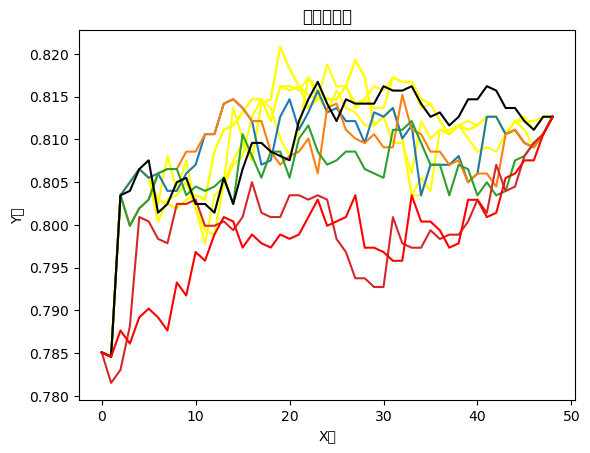

In [35]:
import matplotlib.pyplot as plt

fea_num=[i for i in range(49)]

# 创建图形
plt.plot(fea_num, aver_mean_lis1,color="yellow")
plt.plot(fea_num, aver_mean_lis2,color="yellow")
plt.plot(fea_num, aver_mean_lis3,color="yellow")
plt.plot(fea_num, aver_mean_lis4,color="yellow")
plt.plot(fea_num, aver_mean_lis5,color="yellow")
plt.plot(fea_num, aver_mean_lis6)
plt.plot(fea_num, aver_mean_lis7)
plt.plot(fea_num, aver_mean_lis8)
plt.plot(fea_num, aver_mean_lis9)
plt.plot(fea_num, rfe_SVM_aver_mean_lis,color="black")
plt.plot(fea_num, relief_SVM_aver_mean_lis,color="red")



# 添加标题和标签
plt.title('简单折线图')
plt.xlabel('X轴')
plt.ylabel('Y轴')

# 显示图形
plt.show()


In [55]:
tongren_accuracy=[]
tongren_accuracy.append(aver_mean_lis1)
tongren_accuracy.append(aver_mean_lis2)
tongren_accuracy.append(aver_mean_lis3)
tongren_accuracy.append(aver_mean_lis4)
tongren_accuracy.append(aver_mean_lis5)
tongren_accuracy.append(aver_mean_lis6)
tongren_accuracy.append(aver_mean_lis7)
tongren_accuracy.append(aver_mean_lis8)
tongren_accuracy.append(aver_mean_lis9)
tongren_accuracy.append(rfe_SVM_aver_mean_lis)
tongren_accuracy.append(relief_SVM_aver_mean_lis)

In [56]:
colu=[i for i in range(1,50)]
tongren_acurracy_dataframe=pd.DataFrame(columns=colu,data=np.array(tongren_accuracy))
tongren_acurracy_dataframe.to_csv("tongren_accuracy.csv")

In [57]:
tongren_F_measure=[]
tongren_F_measure.append(F_measure_lis1)
tongren_F_measure.append(F_measure_lis2)
tongren_F_measure.append(F_measure_lis3)
tongren_F_measure.append(F_measure_lis4)
tongren_F_measure.append(F_measure_lis5)
tongren_F_measure.append(F_measure_lis6)
tongren_F_measure.append(F_measure_lis7)
tongren_F_measure.append(F_measure_lis8)
tongren_F_measure.append(F_measure_lis9)
tongren_F_measure.append(rfe_SVM_F_measure_lis)
tongren_F_measure.append(relief_SVM_F_measure_lis)

In [58]:
colu=[i for i in range(1,50)]
tongren_F_measure_dataframe=pd.DataFrame(columns=colu,data=np.array(tongren_F_measure))
tongren_F_measure_dataframe.to_csv("tongren_F_measure.csv")